In [163]:
# Video Link: https://drive.google.com/file/d/1ejeqG6Xx3ImDx9bDA-07bmNMWFwTGyhH/view?usp=sharing
import pandas as pd
import numpy as np
#requirement: pip install rectpack https://github.com/secnot/rectpack
from rectpack import newPacker
import rectpack.packer as packer
import matplotlib.pyplot as plt

In [164]:
def plot_solution(all_rects, pal_812, pal_1010 , pal_1012):
    # Plot
    plt.figure(figsize=(2.5,12))
    # Loop all rect
    for rect in all_rects:
        b, x, y, w, h, rid = rect
        x1, x2, x3, x4, x5 = x, x+w, x+w, x, x
        y1, y2, y3, y4, y5 = y, y, y+h, y+h,y
        
        
        # Pallet type
        if [w, h] == pal_812:
            color = '--k'
        elif [w, h] == pal_1010:
            color = '--b'
        else:
            color = '--r'

        plt.plot([x1,x2,x3,x4,x5],[y1,y2,y3,y4,y5], color)
    
    plt.show()

In [165]:
# Function Solver
def solver(n_812,n_1010, n_1012, bins):
    # Pallets to load
    rectangles = [pal_812 for i in range(n_812)] + [pal_1010 for i in range(n_1010)] + [pal_1012 for i in range(n_1012)] 
    
    # Build the Packer
    pack = newPacker(mode = packer.PackingMode.Offline, bin_algo = packer.PackingBin.Global,
                     rotation=True)

    # Add the rectangles to packing queue
    for r in rectangles:
        pack.add_rect(*r)

    # Add the bins where the rectangles will be placed
    for b in bins:
        pack.add_bin(*b)

    # Start packing
    pack.pack()
    
    # Full rectangle list
    all_rects = pack.rect_list()

    # Pallets with dimensions
    all_pals = [sorted([p[3], p[4]]) for p in all_rects]

    # Count number of 80 x 120 
    p_812, p_1012, p_1010 = all_pals.count(pal_812), all_pals.count(pal_1012), all_pals.count(pal_1010)
    print("{:,}/{:,} Pallets 80 x 120 (cm) | {:,}/{:,} Pallets 100 x 100 (cm) | {:,}/{:,} Pallets 100 x 120 (cm) ".format(p_812, n_812, p_1010, n_1010, p_1012, n_1012))
    
    return all_rects, all_pals

In [166]:
# Pallets Count
#-- 80 x 120 cm

bx = 0
by = 0 
pal_812 = [80 + bx, 120 + by]
#-- 100 x 120 cm
bx = 0
by = 0
pal_1012 = [100 + bx, 120 + by]

bx = 0
by = 0
pal_1010 = [100 + bx, 100 + by]

# Number of pallets
n_812 = 14
n_1010 = 0 
n_1012 = 0 # 100 x 120 cm
rectangles = [pal_812 for i in range(n_812)] + [pal_1010 for i in range(n_1010)] + [pal_1012 for i in range(n_1012)]

# Container size
bins20 = [(236, 595)] 
bins40 = [(236, 1203.396)] 


---

####  Pallet (100 x 120 cm) and (100X100) Mix | 20'

0/0 Pallets 80 x 120 (cm) | 4/20 Pallets 100 x 100 (cm) | 6/11 Pallets 100 x 120 (cm) 


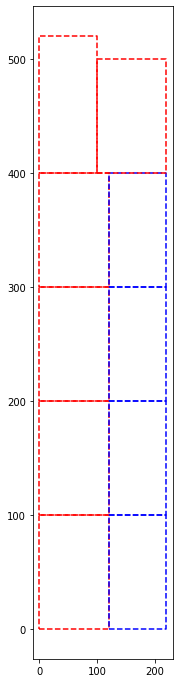

In [167]:
# Test 1
n_812 = 0
n_1012 = 11
n_1010 = 20
all_rects, all_pals = solver(n_812,n_1010, n_1012,  bins20)
plot_solution(all_rects, pal_812, pal_1010, pal_1012 )

#### Mix of 80X100, 100x120, 100X100 Pallets in 40 Feet

5/5 Pallets 80 x 120 (cm) | 11/20 Pallets 100 x 100 (cm) | 8/10 Pallets 100 x 120 (cm) 


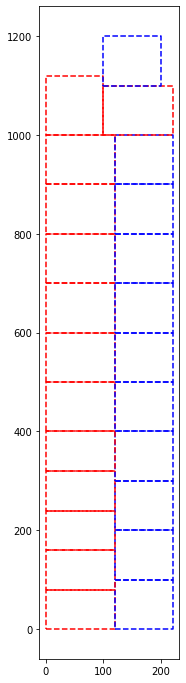

In [169]:
# Test 1
n_812 = 5
n_1010 = 20
n_1012 = 10 # 100 x 120 cm

all_rects, all_pals = solver(n_812, n_1010, n_1012, bins40)
plot_solution(all_rects, pal_812,pal_1010, pal_1012)
#all_rects, all_pals

#### 80x120 and 100x120 Pallets in 20 feet 

6/12 Pallets 80 x 120 (cm) | 0/0 Pallets 100 x 100 (cm) | 5/6 Pallets 100 x 120 (cm) 


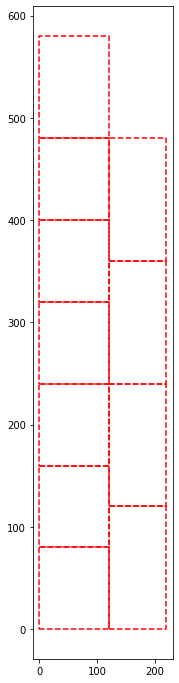

In [170]:
# Test 1
n_812 = 12
n_1010 = 0
n_1012 = 6 # 100 x 120 cm

all_rects, all_pals = solver(n_812, n_1010, n_1012, bins20)
plot_solution(all_rects, pal_812, pal_1010, pal_1012)


#### 100% (100 x 120 cm) | 40'

0/0 Pallets 80 x 120 (cm) | 0/0 Pallets 100 x 100 (cm) | 22/25 Pallets 100 x 120 (cm) 


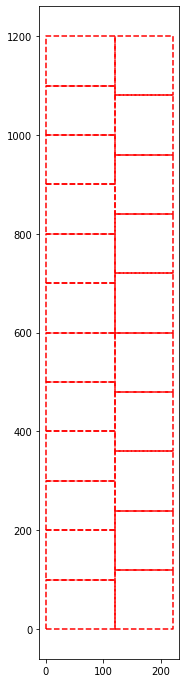

In [171]:
# Test 1
n_812 = 0
n_1010 = 0
n_1012 = 25 # 100 x 120 cm

all_rects, all_pals = solver(n_812,n_1010, n_1012, bins40)
plot_solution(all_rects, pal_812, pal_1010, pal_1012)

---

#### 100%  (80 x 120 cm) Pallet | 40'

25/27 Pallets 80 x 120 (cm) | 0/0 Pallets 100 x 100 (cm) | 0/0 Pallets 100 x 120 (cm) 


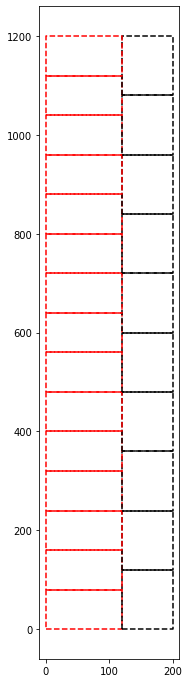

In [172]:
# Test 1
n_812 = 27
n_1010 = 0
n_1012 = 0 # 100 x 120 cm

all_rects, all_pals = solver(n_812,n_1010, n_1012, bins40)
plot_solution(all_rects, pal_812,pal_1010, pal_1012)

---

#### 100%  Pallet (100 x 100 cm) | 40'

0/0 Pallets 80 x 120 (cm) | 24/40 Pallets 100 x 100 (cm) | 0/0 Pallets 100 x 120 (cm) 


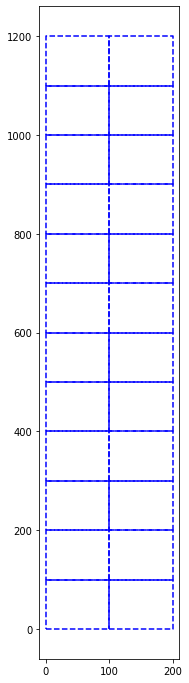

In [173]:
# Test 1
n_812 = 0
n_1010 = 40
n_1012 = 0 # 100 x 120 cm

all_rects, all_pals = solver(n_812,n_1010, n_1012, bins40)
plot_solution(all_rects, pal_812,pal_1010, pal_1012)

#### 100%   (100 x 100 cm) Pallet | 20'

0/0 Pallets 80 x 120 (cm) | 10/12 Pallets 100 x 100 (cm) | 0/0 Pallets 100 x 120 (cm) 


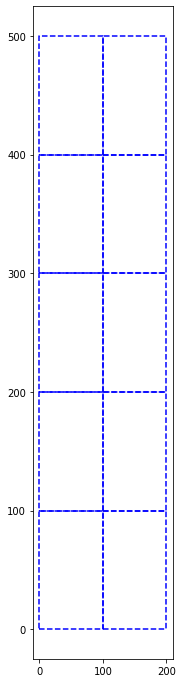

In [174]:
# Test 1
n_812 = 0
n_1012 = 0 
n_1010 = 12 
all_rects, all_pals = solver(n_812,n_1010, n_1012, bins20)
plot_solution(all_rects, pal_812,pal_1010, pal_1012)